Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [171]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [172]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [173]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("D:\\Bleh\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path('D:\\Bleh\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')

In [174]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
#image_count_train = len(os.listdir(data_dir_train))
print(image_count_train)
#image_count_test = len(os.listdir(data_dir_test))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [175]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [176]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9739 files belonging to 9 classes.
Using 7792 files for training.


In [177]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [178]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9739 files belonging to 9 classes.
Using 1947 files for validation.


In [179]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

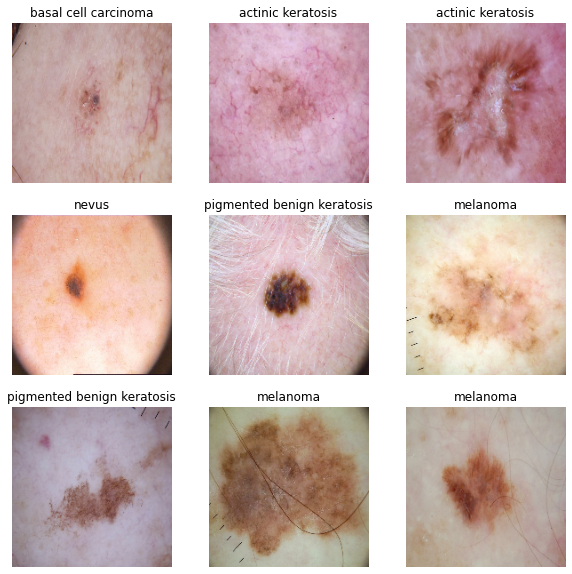

In [180]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [181]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [182]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [183]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [184]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 64)      

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

**_The model clearly overfits_**
- As training accuracy is as high as 0.9035 and the validation accuracy is as low as 0.5235


#### Perform data augentation is overcome the overfitting of the model 

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
  ]
)

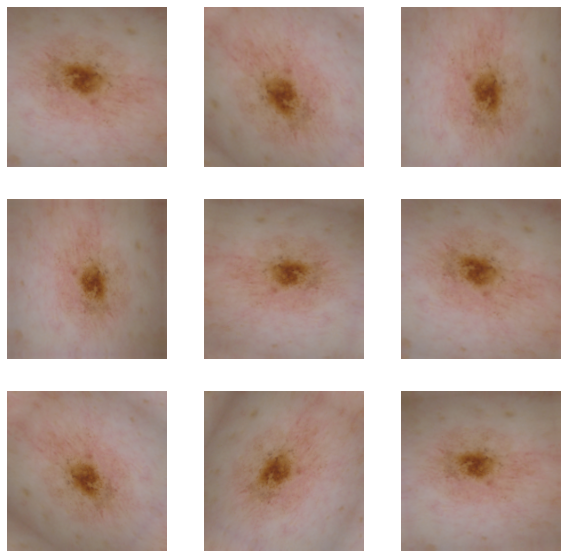

In [27]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.01),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 45, 45, 64)      

### Training the model

In [42]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 58s 986ms/step - loss: 1.9900 - accuracy: 0.2556 - val_loss: 1.7780 - val_accuracy: 0.3647
Epoch 2/20
56/56 [==============================] - 65s 1s/step - loss: 1.7177 - accuracy: 0.3856 - val_loss: 1.6190 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 66s 1s/step - loss: 1.6078 - accuracy: 0.4297 - val_loss: 1.5151 - val_accuracy: 0.4586
Epoch 4/20
56/56 [==============================] - 61s 1s/step - loss: 1.5308 - accuracy: 0.4542 - val_loss: 1.4754 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 63s 1s/step - loss: 1.4635 - accuracy: 0.4961 - val_loss: 1.4437 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 62s 1s/step - loss: 1.4015 - accuracy: 0.5095 - val_loss: 1.5367 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 64s 1s/step - loss: 1.3399 - accuracy: 0.5257 - val_loss: 1.3794 - val_accuracy: 0.5235
Epoch 8/20
56/56 

### Visualizing the results

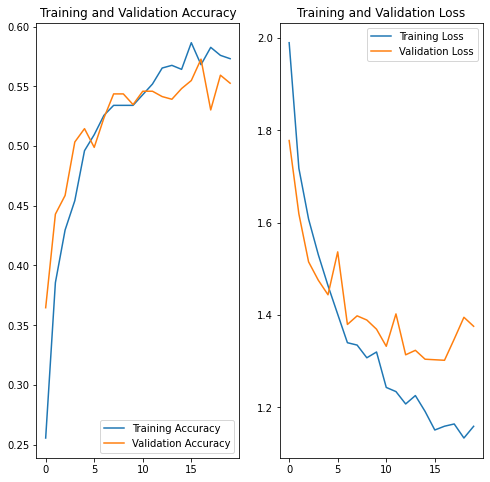

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 45, 45, 64)      

In [46]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 38s 658ms/step - loss: 2.0315 - accuracy: 0.2333 - val_loss: 1.8203 - val_accuracy: 0.3579
Epoch 2/20
56/56 [==============================] - 37s 663ms/step - loss: 1.7201 - accuracy: 0.3795 - val_loss: 1.6389 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 38s 676ms/step - loss: 1.5443 - accuracy: 0.4548 - val_loss: 1.5596 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 39s 696ms/step - loss: 1.4608 - accuracy: 0.4911 - val_loss: 1.4643 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 40s 716ms/step - loss: 1.4089 - accuracy: 0.5050 - val_loss: 1.4825 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 42s 750ms/step - loss: 1.3815 - accuracy: 0.5218 - val_loss: 1.4174 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 43s 774ms/step - loss: 1.3637 - accuracy: 0.5268 - val_loss: 1.4134 - val_accuracy: 0.4832

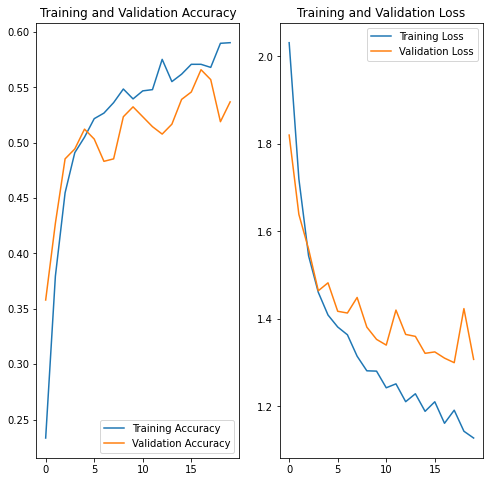

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [95]:
arr=[]
fol=[]
tot=0

directory=os.listdir("D:\\Bleh\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")

for each in directory:
    currentFolder = "D:\\Bleh\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\" + each
i=0
for i, filename in enumerate(os.listdir(currentFolder)[0:]):
      i=i+1
print("{} has {} images".format(each,i))
arr.append(i)
fol.append(each)
tot=tot+i

vascular lesion has 139 images


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

#### - Which classes dominate the data in terms proportionate number of samples?
vascular lesion

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [78]:
!pip install Augmentor

  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=2a400eee1e17ce4506ad1c2f67e4e0c550557a426c942f8f38136919ff6ce01c
  Stored in directory: c:\users\fx505\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [106]:

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train)+"\\" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\Bleh\Python Scripts\Neural Networks\Melanoma Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1469064E0F0>: 100%|█| 500/500 [00:30<00:00, 16.64 Samples/


Initialised with 376 image(s) found.
Output directory set to D:\Bleh\Python Scripts\Neural Networks\Melanoma Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x146AEB83E10>: 100%|█| 500/500 [00:31<00:00, 16.07 Samples/


Initialised with 95 image(s) found.
Output directory set to D:\Bleh\Python Scripts\Neural Networks\Melanoma Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x146939FEC18>: 100%|█| 500/500 [00:33<00:00, 15.01 Samples/


Initialised with 438 image(s) found.
Output directory set to D:\Bleh\Python Scripts\Neural Networks\Melanoma Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x146AE8E2A20>: 100%|█| 500/500 [02:41<00:00,  3.09 Samples/


Initialised with 357 image(s) found.
Output directory set to D:\Bleh\Python Scripts\Neural Networks\Melanoma Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x146AE797860>: 100%|█| 500/500 [03:28<00:


Initialised with 462 image(s) found.
Output directory set to D:\Bleh\Python Scripts\Neural Networks\Melanoma Assignment\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Executing Pipeline:   0%|                                                                | 0/500 [00:02<?, ? Samples/s]


AttributeError: 'FileNotFoundError' object has no attribute 'message'

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [107]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

7500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [111]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\Bleh\\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_08f77850-1a27-442b-ad1d-2c40a6bb9ef2.jpg',
 'D:\\Bleh\\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2771bc80-9f0c-45b9-8668-aaf4165ad848.jpg',
 'D:\\Bleh\\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_52f57a6f-6442-4c2e-8192-41d97fc03f24.jpg',
 'D:\\Bleh\\Python Scripts\\Neural Networks\\Melanoma Assignment\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_origi

In [116]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [118]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [128]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [129]:
df2

,Path,Label
0,D:\Bleh\Python Scripts\Neural Networks\Melanom...,actinic keratosis
1,D:\Bleh\Python Scripts\Neural Networks\Melanom...,actinic keratosis
2,D:\Bleh\Python Scripts\Neural Networks\Melanom...,actinic keratosis
3,D:\Bleh\Python Scripts\Neural Networks\Melanom...,actinic keratosis
4,D:\Bleh\Python Scripts\Neural Networks\Melanom...,actinic keratosis
...,...,...
7495,D:\Bleh\Python Scripts\Neural Networks\Melanom...,nevus
7496,D:\Bleh\Python Scripts\Neural Networks\Melanom...,nevus
7497,D:\Bleh\Python Scripts\Neural Networks\Melanom...,nevus
7498,D:\Bleh\Python Scripts\Neural Networks\Melanom...,nevus


In [132]:
directory_df = pd.DataFrame(directory)
new_df = directory_df.append(df2)

In [133]:
new_df['Label'].value_counts()

nevus                   1500
dermatofibroma          1500
basal cell carcinoma    1500
actinic keratosis       1500
melanoma                1500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [134]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [170]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data_dir_train\\dataframe_dict_new'

#### **Todo:** Create a validation dataset

In [160]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_new,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data_dir_train\\                         0  Label  \\\n0        actinic keratosis    NaN   \n1     basal cell carcinoma    NaN   \n2           dermatofibroma    NaN   \n3                 melanoma    NaN   \n4                    nevus    NaN   \n...                    ...    ...   \n7495                   NaN  nevus   \n7496                   NaN  nevus   \n7497                   NaN  nevus   \n7498                   NaN  nevus   \n7499                   NaN  nevus   \n\n                                                   Path  \n0                                                   NaN  \n1                                                   NaN  \n2                                                   NaN  \n3                                                   NaN  \n4                                                   NaN  \n...                                                 ...  \n7495  D:\\Bleh\\Python Scripts\\Neural Networks\\Melanom...  \n7496  D:\\Bleh\\Python Scripts\\Neural Networks\\Melanom...  \n7497  D:\\Bleh\\Python Scripts\\Neural Networks\\Melanom...  \n7498  D:\\Bleh\\Python Scripts\\Neural Networks\\Melanom...  \n7499  D:\\Bleh\\Python Scripts\\Neural Networks\\Melanom...  \n\n[7511 rows x 3 columns]\\*'

#### **Todo:** Create your model (make sure to include normalization)

In [167]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization()
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization()
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [168]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [169]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 256s 4s/step - loss: 2.0175 - accuracy: 0.3549 - val_loss: 2.1200 - val_accuracy: 0.1588
Epoch 2/30
56/56 [==============================] - 239s 4s/step - loss: 1.5009 - accuracy: 0.4805 - val_loss: 2.1556 - val_accuracy: 0.1499
Epoch 3/30
26/56 [============>.................] - ETA: 2:00 - loss: 1.3679 - accuracy: 0.5216

KeyboardInterrupt: 

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
yes 